In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.shape, deliveries.shape

((756, 18), (179078, 21))

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
totalrun_df = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
totalrun_df.head(6)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
5,3,2,184


In [7]:
#Capturing first inning data, as we will be predicting for the second innings
totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df.head()

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158


In [8]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
match_df = matches.merge(totalrun_df[['match_id', 'total_runs']],
                        left_on='id', right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
teams = ['Sunrisers Hyderabad', 
         'Mumbai Indians', 
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals']

In [12]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [13]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

# EDA

In [14]:
match_df[match_df['dl_applied'] == 1].style.background_gradient(cmap='autumn')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,10-05-2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [15]:
#Ignoring the rows which were DL method
match_df = match_df[match_df['dl_applied']==0]
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [16]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
delivery_df = match_df.merge(deliveries, on='match_id')
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [18]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [20]:
 delivery_df.shape

(72413, 24)

In [21]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [22]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [23]:
delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [24]:
delivery_df['player_dismissed'].unique()

array([nan, 'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head',
       'Sachin Baby', 'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills',
       'YS Chahal', 'AP Tare', 'KK Nair', 'SW Billings', 'SV Samson',
       'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem',
       'PA Patel', 'JC Buttler', 'RG Sharma', 'KH Pandya', 'KA Pollard',
       'N Rana', 'M Vohra', 'AR Patel', 'SP Narine', 'RV Uthappa',
       'MJ McClenaghan', 'S Dhawan', 'DA Warner', 'MC Henriques',
       'DJ Hooda', 'Yuvraj Singh', 'BCJ Cutting', 'WP Saha', 'HM Amla',
       'EJG Morgan', 'GJ Maxwell', 'DA Miller', 'MM Sharma',
       'KC Cariappa', 'C de Grandhomme', 'G Gambhir', 'YK Pathan',
       'SA Yadav', 'CR Woakes', 'I Sharma', 'AD Mathews', 'SS Iyer',
       'CJ Anderson', 'K Rabada', 'V Kohli', 'AB de Villiers', 'P Negi',
       'S Badree', 'MK Pandey', 'MJ Guptill', 'SE Marsh', 'Anureet Singh',
       'SP Jackson', 'KV Sharma', 'A Choudhary', 'MN Samuels',
       'Mohammed Shami', 'Z Khan

In [25]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
delivery_df['player_dismissed'].unique()

array([0, 1])

In [27]:
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [28]:
# Calculating Run Rate
delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [29]:
def resultfun(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [30]:
delivery_df['result'] = delivery_df.apply(resultfun, axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


<AxesSubplot:xlabel='result', ylabel='count'>

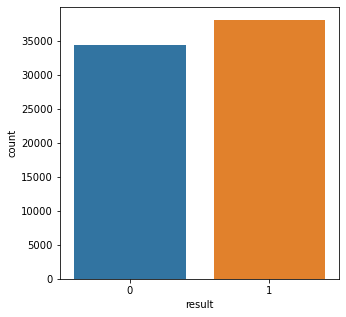

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(delivery_df['result'])

In [40]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left',
                       'balls_left', 'wickets', 'total_runs_x', 'cur_run_rate',
                       'req_run_rate', 'result']]
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


In [41]:
final_df.shape

(72413, 10)

In [42]:
 final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
cur_run_rate      0
req_run_rate      5
result            0
dtype: int64

In [43]:
final_df = final_df.dropna()

In [45]:
final_df = final_df[final_df['balls_left'] != 0]

In [46]:
data = final_df.copy()

In [48]:
X = data.drop('result', axis=1)
y = data['result']
X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((57073, 9), (14269, 9))

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cf = ColumnTransformer([('trf', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])], remainder='passthrough')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
                ('step1', cf),
                ('step2', LogisticRegression(solver='liblinear'))
                ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [52]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.8064335272268555

In [55]:
pipe.predict_proba(X_test)[52]

array([0.951981, 0.048019])

In [56]:
from sklearn.ensemble import RandomForestClassifier
pipe2 = Pipeline(steps=[
                ('step1', cf),
                ('step2', RandomForestClassifier())
                ])

pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9993692620365828

In [57]:
 pipe2.predict_proba(X_test)[10]

array([0.03, 0.97])

### RFClassifier has overfit the model, so we will use LogisticRegression.

In [58]:
# Saving the LogisticRegression Model
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [ ]:
final